In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

In [13]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [23]:
data['IndicatorName'].unique().tolist()

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

In [155]:
data['CountryName'].unique().tolist()

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [199]:
Unique = data[['CountryCode', 'CountryName', 'Year']].drop_duplicates()
Unique[Unique['CountryName'].str.contains('Suriname')].tail(10)

,CountryCode,CountryName,Year
4276554,SUR,Suriname,2006
4456991,SUR,Suriname,2007
4637078,SUR,Suriname,2008
4815622,SUR,Suriname,2009
5001634,SUR,Suriname,2010
5179584,SUR,Suriname,2011
5354996,SUR,Suriname,2012
5513791,SUR,Suriname,2013
5628066,SUR,Suriname,2014
5654510,SUR,Suriname,2015


In [233]:
lstTop25 = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation',
            'Japan', 'Mexico', 'Philippines', 'Egypt, Arab Rep.', 'Ethiopia', 'Vietnam', 'Germany', 'Congo, Dem. Rep.', 
            'Iran, Islamic Rep.', 'Turkey', 'France', 'Thailand', 'United Kingdom', 'Italy', 'South Africa', 'Myanmar']

#removed ('Andorra', 'Liechtenstein', 'Malta', 'Monaco', 'San Marino') for lack of GDP data
lstBottom25 = ['Vatican City', 'Tuvalu', 'Nauru', 'Palau', 'St. Kitts and Nevis', 
               'Marshall Islands', 'Dominica', 'Antigua and Barbuda', 'Seychelles', 'Tonga', 'Grenada', 
               'Micronesia, Fed. Sts.', 'St. Vincent and the Grenadines', 'Kiribati', 'St. Lucia', 'Sao Tome and Principe', 
               'Samoa', 'Barbados', 'Vanuatu', 'Maldives', 'Iceland', 'Bahamas, The', 'Belize', 'Brunei Darussalam', 
               'Cabo Verde', 'Suriname','Luxembourg']

print(lstTop25)
print(lstBottom25)

['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan', 'Mexico', 'Philippines', 'Egypt, Arab Rep.', 'Ethiopia', 'Vietnam', 'Germany', 'Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Turkey', 'France', 'Thailand', 'United Kingdom', 'Italy', 'South Africa', 'Myanmar']
['Vatican City', 'Tuvalu', 'Nauru', 'Palau', 'St. Kitts and Nevis', 'Marshall Islands', 'Dominica', 'Antigua and Barbuda', 'Seychelles', 'Tonga', 'Grenada', 'Micronesia, Fed. Sts.', 'St. Vincent and the Grenadines', 'Kiribati', 'St. Lucia', 'Sao Tome and Principe', 'Samoa', 'Barbados', 'Vanuatu', 'Maldives', 'Iceland', 'Bahamas, The', 'Belize', 'Brunei Darussalam', 'Cabo Verde', 'Suriname', 'Luxembourg']


In [234]:
indicatorName = data['IndicatorName'] == 'Population, total'
year = data['Year'] == 2014
top25 = data['CountryName'].isin(lstTop25)
bottom25 = data['CountryName'].isin(lstBottom25)

top25countriesPopulation = data[indicatorName & year & top25]
bottom25countriesPopulation = data[indicatorName & year & bottom25]

#country['Value'].values

#plt.plot(country['Year'].values, country['Value'].values)


#plt.axis([1993, 2015,75,85])
#plt.show()

In [235]:
top25countriesPopulation[['CountryName', 'CountryCode', 'Year', 'Value']].sort_values(by='Value', ascending = False)

,CountryName,CountryCode,Year,Value
5564648,China,CHN,2014,1.364270e+09
5585606,India,IND,2014,1.295292e+09
5637468,United States,USA,2014,3.188571e+08
5586245,Indonesia,IDN,2014,2.544548e+08
5558180,Brazil,BRA,2014,2.060779e+08
5612237,Pakistan,PAK,2014,1.850443e+08
5610780,Nigeria,NGA,2014,1.774760e+08
5552617,Bangladesh,BGD,2014,1.590775e+08
5617961,Russian Federation,RUS,2014,1.438196e+08
5589436,Japan,JPN,2014,1.271318e+08


In [236]:
bottom25countriesPopulation[['CountryName', 'CountryCode', 'Year', 'Value']].sort_values(by='Value', ascending = True)

,CountryName,CountryCode,Year,Value
5635183,Tuvalu,TUV,2014,9893.0
5612584,Palau,PLW,2014,21097.0
5601587,Marshall Islands,MHL,2014,52898.0
5626393,St. Kitts and Nevis,KNA,2014,54944.0
5571166,Dominica,DMA,2014,72341.0
5548798,Antigua and Barbuda,ATG,2014,90900.0
5621577,Seychelles,SYC,2014,91526.0
5603698,"Micronesia, Fed. Sts.",FSM,2014,104044.0
5632986,Tonga,TON,2014,105586.0
5580393,Grenada,GRD,2014,106349.0


In [237]:
len(bottom25countriesPopulation['Value'])

25

In [238]:
indicatorName = data['IndicatorName'] == 'GDP per capita (current US$)'

top25countriesGDPPerCapita = data[indicatorName & year & top25]
bottom25countriesGDPPerCapita = data[indicatorName & year & bottom25]

In [239]:
top25countriesGDPPerCapita[['CountryName', 'CountryCode', 'Year', 'Value']].sort_values(by='Value', ascending = False)

,CountryName,CountryCode,Year,Value
5637326,United States,USA,2014,54629.495168
5578600,Germany,DEU,2014,47821.917464
5636904,United Kingdom,GBR,2014,46331.977410
5576441,France,FRA,2014,42732.566503
5589281,Japan,JPN,2014,36194.415613
5588243,Italy,ITA,2014,34908.500975
5617729,Russian Federation,RUS,2014,12735.918402
5557887,Brazil,BRA,2014,11384.415010
5634154,Turkey,TUR,2014,10515.007820
5603031,Mexico,MEX,2014,10325.646066


In [240]:
len(top25countriesGDPPerCapita['Value'])

25

In [241]:
bottom25countriesGDPPerCapita[['CountryName', 'CountryCode', 'Year', 'Value']].sort_values(by='Value', ascending = False)

,CountryName,CountryCode,Year,Value
5597012,Luxembourg,LUX,2014,116664.262488
5584853,Iceland,ISL,2014,52004.485748
5558472,Brunei Darussalam,BRN,2014,40979.641943
5551626,"Bahamas, The",BHS,2014,22217.494139
5621427,Seychelles,SYC,2014,15543.214782
5626278,St. Kitts and Nevis,KNA,2014,15510.393926
5552875,Barbados,BRB,2014,15366.292611
5548679,Antigua and Barbuda,ATG,2014,13432.079330
5612478,Palau,PLW,2014,11879.677812
5628140,Suriname,SUR,2014,9680.115914


In [242]:
len(bottom25countriesGDPPerCapita['Value'])

25

In [246]:
#(Andorra, Liechtenstein, Malta, Monaco, San Marino) need to be removed
#bottom25countriesPopulation.merge(bottom25countriesGDPPerCapita, on='CountryCode', how='inner')

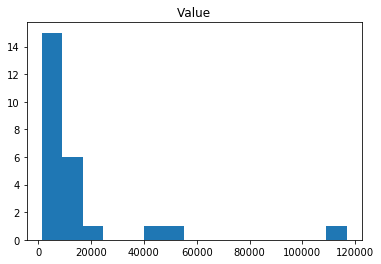

In [286]:
bottom25countriesGDPPerCapita.hist(column='Value', normed=False, grid=False, bins = 15)
plt.show()

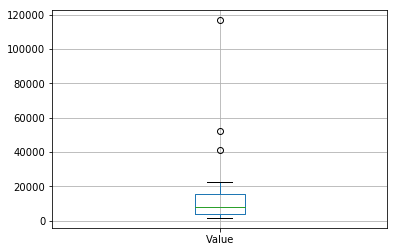

In [275]:
bottom25countriesGDPPerCapita.boxplot(column='Value')
plt.show()

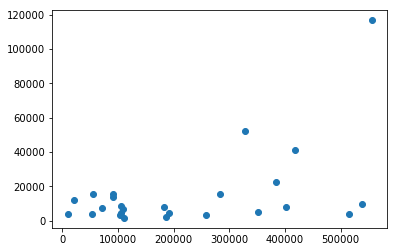

In [293]:
X = bottom25countriesGDPPerCapita['Value']
Y = bottom25countriesPopulation['Value']

plt.scatter(Y, X)
plt.show()

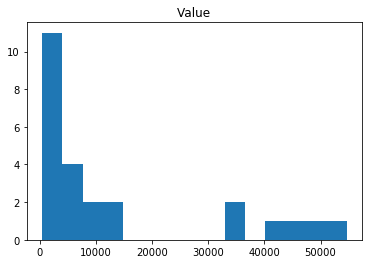

In [287]:
top25countriesGDPPerCapita.hist(column='Value', normed=False, grid=False, bins = 15)
plt.show()

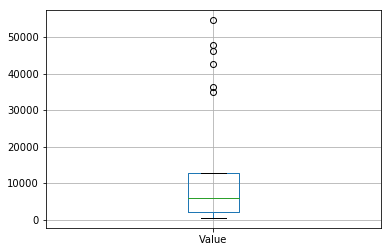

In [288]:
top25countriesGDPPerCapita.boxplot(column='Value')
plt.show()

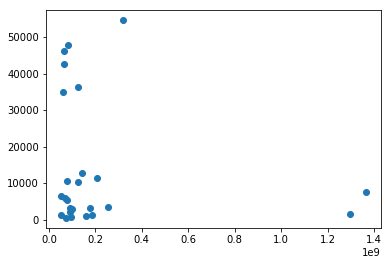

In [294]:
X = top25countriesGDPPerCapita['Value']
Y = top25countriesPopulation['Value']

plt.scatter(Y, X)
plt.show()